In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the processed data
df = pd.read_csv('Processed_Arrest_Data_Final.csv')

# Sequential Pattern Mining algorithm

In [2]:
# Group crime descriptions by case number
grouped_data = df.groupby('Case Number')['Statute or Ordinance Description'].apply(list).tolist()
grouped_data

[['2nd Degree Burglary'],
 ['2nd Degree Burglary'],
 ['1st Degree Criminal Trespass'],
 ['Criminal Mischief $1,000-$4,999-Business'],
 ['PROHIBITED ACTS-PAWNBROKER-SUBSEQUENT OFFENSE', 'Theft'],
 ['Failure to Appear', 'Repealed'],
 ['Obstruction of Telephone Service'],
 ['2nd Degree Burglary', 'Violation of a Protection Order'],
 ['FTA/FTP/FTC El Paso County Traffic Bench Warrants',
  '3rd Degree Burglary',
  'Theft',
  '2nd Degree Burglary'],
 ['Theft'],
 ['Sexual Exploitation of Children', 'Sexual Assault on a Child'],
 ["Sexual Assault Overcome Victim's Will"],
 ['Theft', 'Identity theft'],
 ['Open marijuana container', 'Repealed', 'Possession of Drug Paraphernalia'],
 ['Marijuana Plant-Cultivate, Grow, or Produce-More than 30 plants'],
 ['Theft'],
 ['False Reporting to Authorities',
  'Insurance Fraud-Accident for false claim',
  '3rd Degree Arson',
  '1st Degree Arson',
  'Attempt to Influence a Public Servant by Threat of Violence/Economic Reprisal'],
 ['Identity theft'],
 ['Thef

In [3]:
# Initialize the TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(grouped_data).transform(grouped_data)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm
frequent_itemsets = apriori(df_trans, min_support=0.001, use_colnames=True)

# Generate association rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.10)

In [4]:
# Get the number of frequent itemsets and rules
frequent_itemsets_count = len(frequent_itemsets)
rules_count = len(rules)

print(f"Number of frequent itemsets: {frequent_itemsets_count}")
print(f"Number of association rules: {rules_count}")

Number of frequent itemsets: 482
Number of association rules: 406


## Results of the SPM algorithm (Sorted by Confidence)
### - Frequent Itemsets
### - Rules


In [5]:
from IPython.display import display

# Sort the rules by confidence in descending order
rules_sorted = rules.sort_values(by='confidence', ascending=False)

# Convert frequent itemsets and sorted rules to DataFrames
frequent_itemsets_df = pd.DataFrame(frequent_itemsets)
rules_sorted_df = pd.DataFrame({
    'Antecedents': rules_sorted['antecedents'],
    'Consequents': rules_sorted['consequents'],
    'Support': rules_sorted['support'],
    'Confidence': rules_sorted['confidence'],
    'Lift': rules_sorted['lift']
})

# Display the DataFrames interactively
display(frequent_itemsets_df)
display(rules_sorted_df)


,support,itemsets
0,0.001625,(1st Degree Assault)
1,0.002451,(1st Degree Assault SBI)
2,0.003684,(1st Degree Burglary)
3,0.020144,(1st Degree Criminal Trespass)
4,0.011879,(2nd Degree Assault)
...,...,...
477,0.001009,(FTA/FTP/FTC El Paso County Traffic Bench Warr...
478,0.001247,"(Possession of Drug Paraphernalia, Repealed, F..."
479,0.001541,"(Harassment, Stalking, Violation of a Protecti..."
480,0.001667,"(Driving under the influence, Compulsory insur..."


,Antecedents,Consequents,Support,Confidence,Lift
370,"(Driving on roadways laned for traffic, Licens...",(Driving under the influence),0.001247,0.936842,11.558488
322,"(Careless Driving-Accident, License for driver...",(Driving under the influence),0.002087,0.886905,10.942375
273,"(Compulsory insurance, Accident involving damage)",(Duty to report accidents),0.001121,0.816327,117.252084
268,"(Careless Driving-Accident, Accident involving...",(Duty to report accidents),0.001457,0.806202,115.797795
49,(Accident involving damage),(Duty to report accidents),0.002536,0.800885,115.034152
...,...,...,...,...,...
7,(2nd Degree Assault),(Resisting Arrest),0.001205,0.101415,11.311903
289,(Driving Under Restraint),"(Compulsory insurance, Careless Driving-Accident)",0.002522,0.101010,11.249153
288,(Compulsory insurance),"(Careless Driving-Accident, Driving Under Rest...",0.002522,0.100897,22.508198
75,(Driving on roadways laned for traffic),(Careless Driving-Accident),0.001401,0.100806,3.686562


# Clustering model

In [6]:
# Select the relevant columns
columns_of_interest = ['Age Category', 'Age Range', 'Race', 'Gender', 'Ethnicity']
data_subset = df[columns_of_interest]

# Take a random sample of the data for optimization
sampled_data = data_subset.sample(n=25000, random_state=42)

# Apply one-hot encoding to the categorical variables on the sampled data
# encoder = OneHotEncoder(sparse=False)
encoder = OneHotEncoder(sparse_output=False)
encoded_sampled_data = encoder.fit_transform(sampled_data)

## Determine the number of clusters using Elbow Method

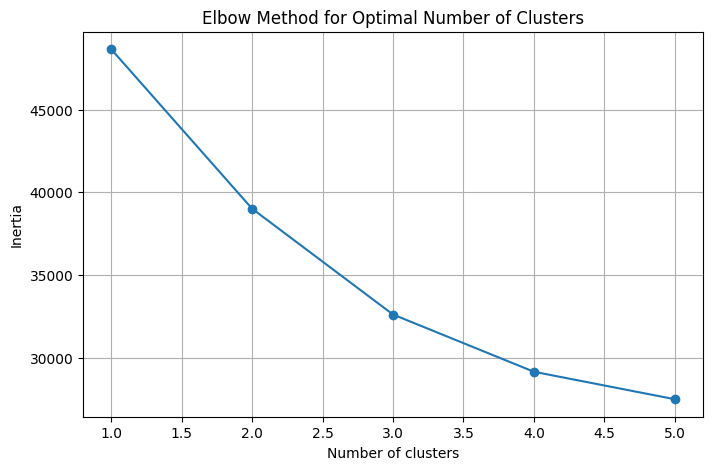

In [7]:
# Determine the optimal number of clusters using the elbow method on the sampled data
inertia = []
k_values = range(1, 6)  # Checking for fewer clusters to speed up the process

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(encoded_sampled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

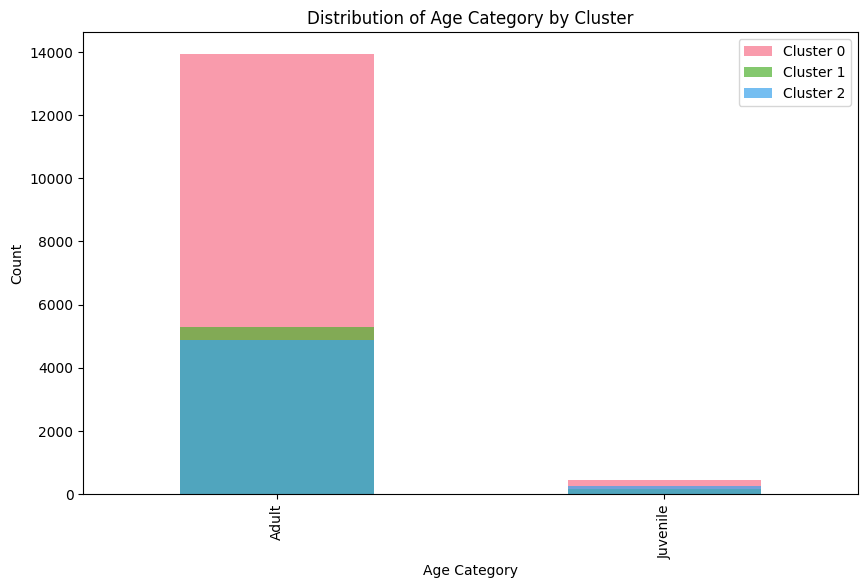

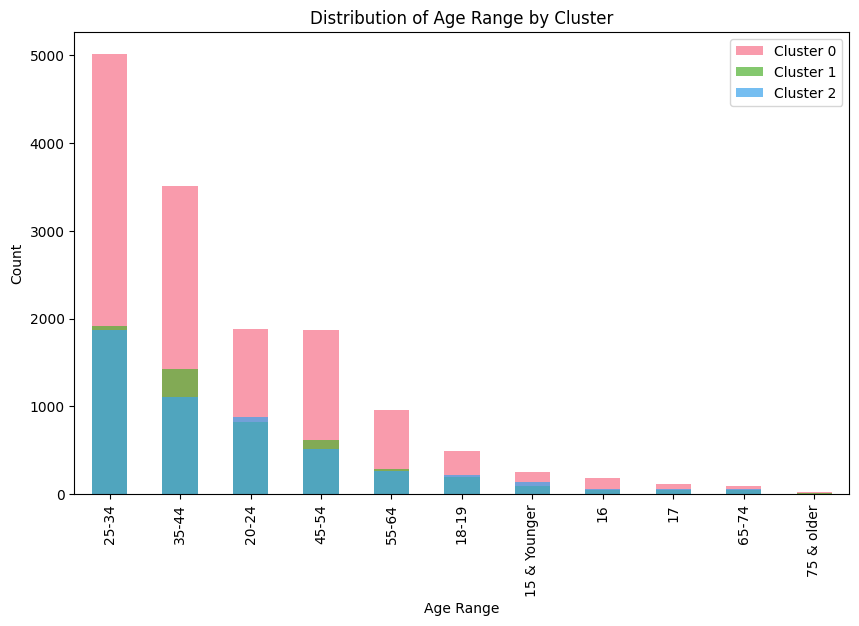

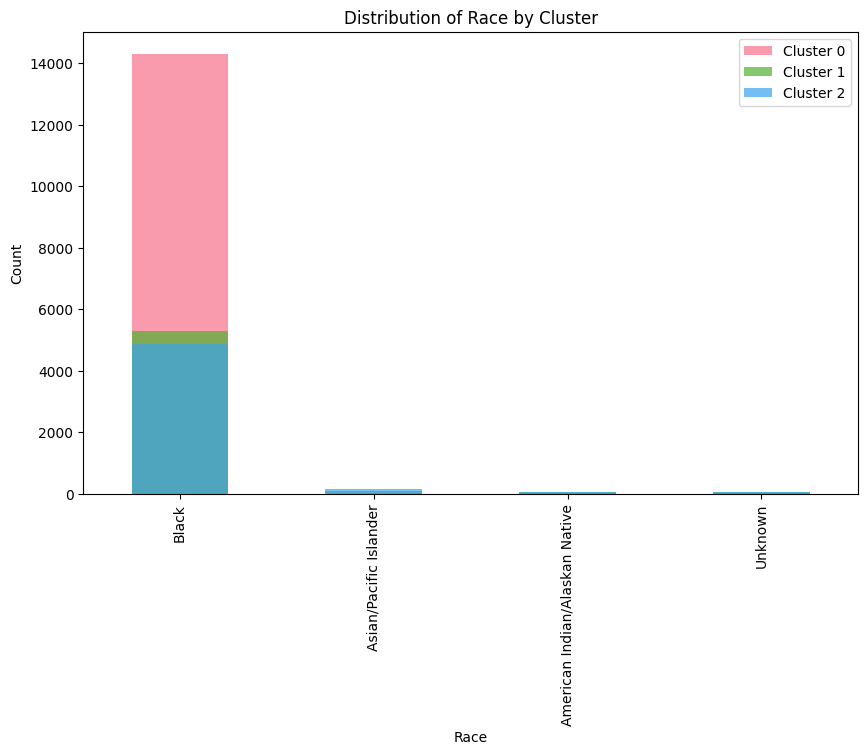

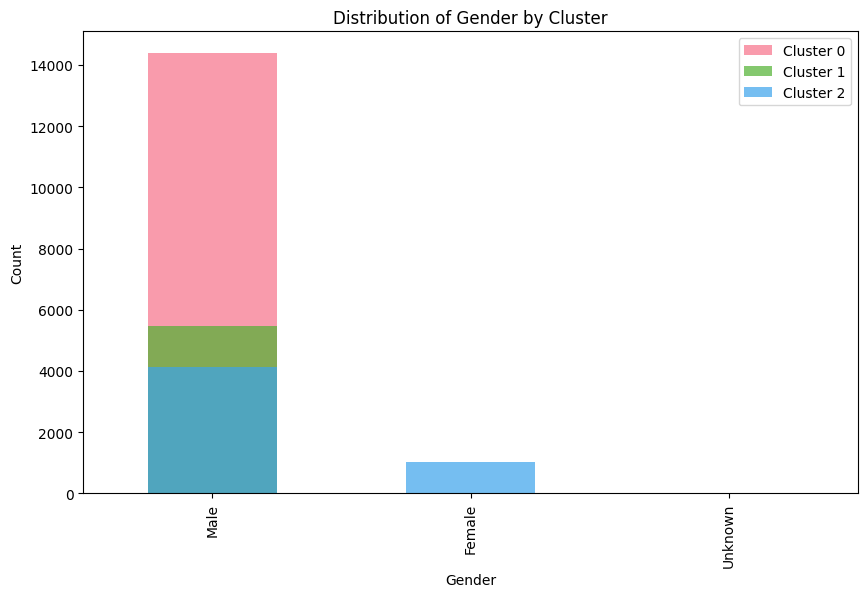

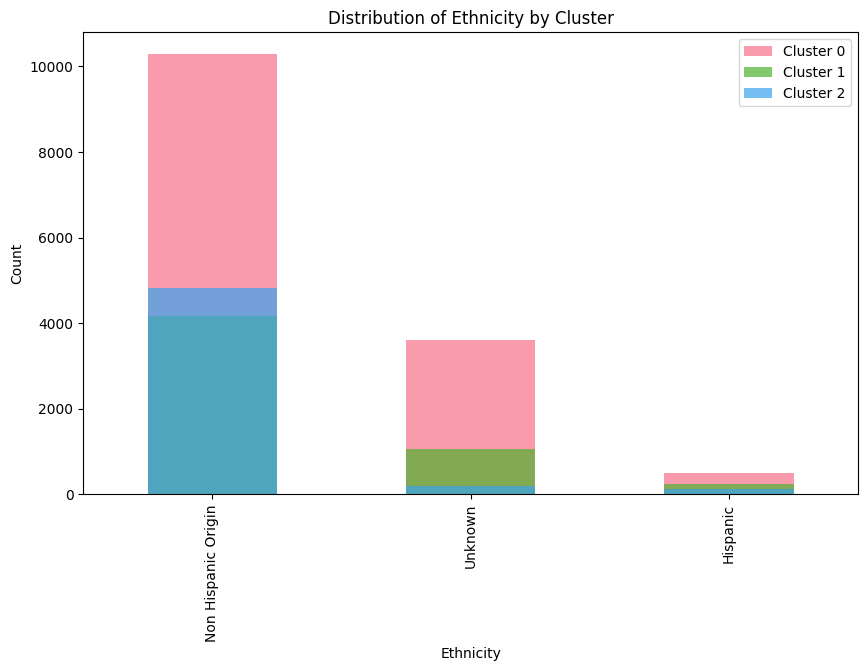

In [8]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Choose the optimal number of clusters based on the elbow plot (example: 3)
optimal_k = 3

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(encoded_sampled_data)

# Evaluate the clusters
silhouette_avg = silhouette_score(encoded_sampled_data, clusters)
davies_bouldin_avg = davies_bouldin_score(encoded_sampled_data, clusters)

# Step 6: Add the cluster labels to the sampled data
sampled_data['Cluster'] = clusters

# Determine the most occurring categories within each cluster
cluster_analysis = sampled_data.groupby('Cluster').agg(lambda x: x.value_counts().idxmax())

# Plot the cluster analysis results
colors = sns.color_palette("husl", optimal_k)  # Generate distinct colors for each cluster

for column in columns_of_interest:
    plt.figure(figsize=(10, 6))
    for cluster in range(optimal_k):
        counts = sampled_data[sampled_data['Cluster'] == cluster][column].value_counts()
        counts.plot(kind='bar', alpha=0.7, color=colors[cluster], label=f'Cluster {cluster}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column} by Cluster')
    plt.legend()
    plt.show()

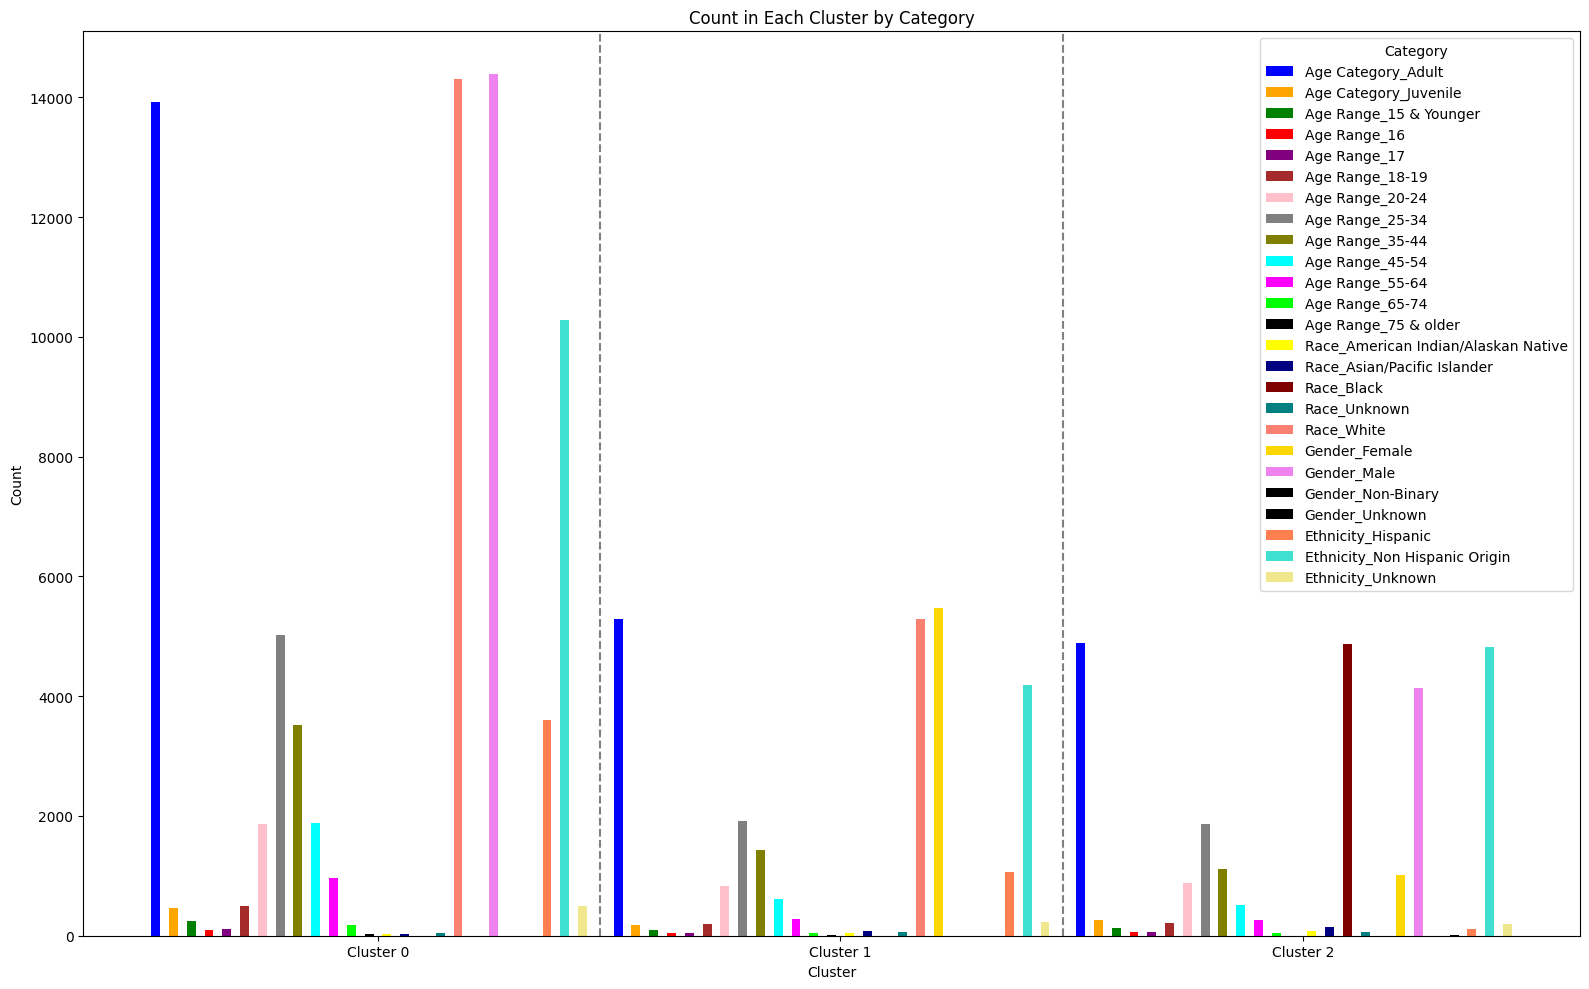

In [9]:
import numpy as np
# Add the cluster labels to the sampled data
sampled_data['Cluster'] = clusters

# Calculate the count of each category by cluster
encoded_sampled_data_df = pd.DataFrame(encoded_sampled_data, columns=encoder.get_feature_names_out(columns_of_interest))
encoded_sampled_data_df['Cluster'] = clusters
category_counts = encoded_sampled_data_df.groupby('Cluster').sum()

# Plot the results
categories = encoder.get_feature_names_out(columns_of_interest)
cluster_labels = range(optimal_k)

# Define a distinct color palette
color_palette = {
    'Age Category_Adult': 'blue',
    'Age Category_Juvenile': 'orange',
    'Age Range_15 & Younger': 'green',
    'Age Range_16': 'red',
    'Age Range_17': 'purple',
    'Age Range_18-19': 'brown',
    'Age Range_20-24': 'pink',
    'Age Range_25-34': 'gray',
    'Age Range_35-44': 'olive',
    'Age Range_45-54': 'cyan',
    'Age Range_55-64': 'magenta',
    'Age Range_65-74': 'lime',
    'Race_American Indian/Alaskan Native': 'yellow',
    'Race_Asian/Pacific Islander': 'navy',
    'Race_Black': 'maroon',
    'Race_Unknown': 'teal',
    'Race_White': 'salmon',
    'Gender_Female': 'gold',
    'Gender_Male': 'violet',
    'Ethnicity_Hispanic': 'coral',
    'Ethnicity_Non Hispanic Origin': 'turquoise',
    'Ethnicity_Unknown': 'khaki'
}

# Create a bar plot with space between clusters
x = np.arange(len(cluster_labels) * (len(categories) + 1))  # the label locations with space
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 10))

# Add bars for each category with consistent colors
for i, category in enumerate(categories):
    ax.bar(x[i::len(categories) + 1], category_counts[category], width, label=category, color=color_palette.get(category, 'black'))

# Add some text for labels, title,a and custom x-axis tick labels, etc.
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.set_title('Count in Each Cluster by Category')

# Set custom x-ticks to show cluster labels with space
cluster_positions = [(i * (len(categories) + 1)) + (len(categories) / 2) for i in range(len(cluster_labels))]
ax.set_xticks(cluster_positions)
ax.set_xticklabels([f'Cluster {i}' for i in cluster_labels])

# Add vertical lines to separate clusters
for pos in cluster_positions[:-1]:
    ax.axvline(x=pos + (len(categories) / 2), color='grey', linestyle='--')

ax.legend(title='Category', loc='upper right')

fig.tight_layout()

plt.show()

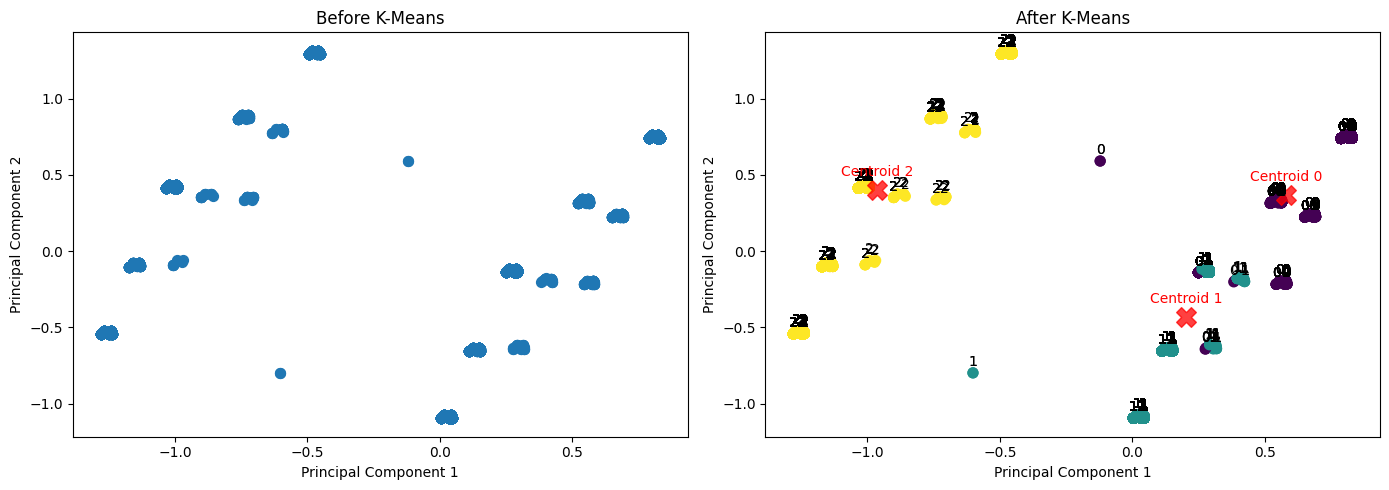

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming encoded_sampled_data and clusters are already defined
# If not, you need to ensure they are prepared. Here's an example of how they might be created:

# Load and preprocess data (example)
df = pd.read_csv('Processed_Arrest_Data_Final.csv')
columns_of_interest = ['Age Category', 'Age Range', 'Race', 'Gender', 'Ethnicity']
sampled_data = df[columns_of_interest].sample(frac=0.1, random_state=42)  # Example sampling

# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded_sampled_data = encoder.fit_transform(sampled_data)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(encoded_sampled_data)

# Apply K-Means clustering
optimal_k = 3  # Example: Replace with the optimal number of clusters determined earlier
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(encoded_sampled_data)

# Visualize the original data
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=50)
plt.title('Before K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Visualize the clustered data with labels
plt.subplot(1, 2, 2)
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
reduced_centers = pca.transform(centers)  # Transform cluster centers using PCA
plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('After K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add labels for the clusters
for i, txt in enumerate(clusters):
    plt.annotate(txt, (reduced_data[i, 0], reduced_data[i, 1]), textcoords="offset points", xytext=(0,5), ha='center')

# Add labels for the centroids
for i, txt in enumerate(range(optimal_k)):
    plt.annotate(f'Centroid {txt}', (reduced_centers[i, 0], reduced_centers[i, 1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')

plt.tight_layout()
plt.show()

In [15]:
# Add the cluster labels to the sampled data
sampled_data['Cluster'] = kmeans.labels_

# Display the first few rows of the sampled data with cluster labels
sampled_data.head()

,Age Category,Age Range,Race,Gender,Ethnicity,Cluster
85278,Adult,25-34,White,Male,Non Hispanic Origin,1
14967,Adult,20-24,Black,Male,Non Hispanic Origin,0
26369,Adult,35-44,Black,Male,Non Hispanic Origin,0
64999,Adult,25-34,White,Female,Non Hispanic Origin,2
122679,Juvenile,15 & Younger,White,Male,Non Hispanic Origin,1


## Evaluation of the Clustering model

In [16]:
# Calculate and print evaluation metrics
silhouette_avg = silhouette_score(encoded_sampled_data, kmeans.labels_)
davies_bouldin_avg = davies_bouldin_score(encoded_sampled_data, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")

Silhouette Score: 0.23944098445700307
Davies-Bouldin Index: 1.9158479367924663


# Creation of the application

In [ ]:
import tkinter as tk
from tkinter import ttk
# Application class
class SPMClusteringApp(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("SPM Clustering Application")
        self.geometry("800x600")
        
        # Configure grid layout
        self.grid_columnconfigure(0, weight=1)
        self.grid_columnconfigure(1, weight=1)
        self.grid_rowconfigure(7, weight=1)
        # UI elements
        self.crime_label = ttk.Label(self, text="Select Crime:")
        self.crime_label.grid(row=0, column=0, padx=10, pady=10)
        self.crime_var = tk.StringVar()
        self.crime_dropdown = ttk.Combobox(self, textvariable=self.crime_var)
        self.crime_dropdown['values'] = df['Statute or Ordinance Description'].unique().tolist()
        self.crime_dropdown.grid(row=0, column=1, padx=10, pady=10)

        self.age_category_label = ttk.Label(self, text="Age Category:")
        self.age_category_label.grid(row=1, column=0, padx=10, pady=10)
        self.age_category_var = tk.StringVar()
        self.age_category_dropdown = ttk.Combobox(self, textvariable=self.age_category_var)
        self.age_category_dropdown['values'] = df['Age Category'].unique().tolist()
        self.age_category_dropdown.grid(row=1, column=1, padx=10, pady=10)

        self.age_range_label = ttk.Label(self, text="Age Range:")
        self.age_range_label.grid(row=2, column=0, padx=10, pady=10)
        self.age_range_var = tk.StringVar()
        self.age_range_dropdown = ttk.Combobox(self, textvariable=self.age_range_var)
        self.age_range_dropdown['values'] = df['Age Range'].unique().tolist()
        self.age_range_dropdown.grid(row=2, column=1, padx=10, pady=10)

        self.race_label = ttk.Label(self, text="Race:")
        self.race_label.grid(row=3, column=0, padx=10, pady=10)
        self.race_var = tk.StringVar()
        self.race_dropdown = ttk.Combobox(self, textvariable=self.race_var)
        self.race_dropdown['values'] = df['Race'].unique().tolist()
        self.race_dropdown.grid(row=3, column=1, padx=10, pady=10)

        self.gender_label = ttk.Label(self, text="Gender:")
        self.gender_label.grid(row=4, column=0, padx=10, pady=10)
        self.gender_var = tk.StringVar()
        self.gender_dropdown = ttk.Combobox(self, textvariable=self.gender_var)
        self.gender_dropdown['values'] = df['Gender'].unique().tolist()
        self.gender_dropdown.grid(row=4, column=1, padx=10, pady=10)

        self.ethnicity_label = ttk.Label(self, text="Ethnicity:")
        self.ethnicity_label.grid(row=5, column=0, padx=10, pady=10)
        self.ethnicity_var = tk.StringVar()
        self.ethnicity_dropdown = ttk.Combobox(self, textvariable=self.ethnicity_var)
        self.ethnicity_dropdown['values'] = df['Ethnicity'].unique().tolist()
        self.ethnicity_dropdown.grid(row=5, column=1, padx=10, pady=10)
        # Create a style for the button
        style = ttk.Style()
        style.configure('Custom.TButton', 
                        font=('Helvetica', 12), 
                        foreground='white', 
                        background='blue',
                        padding=10)
        style.map('Custom.TButton', 
                  background=[('active', 'darkblue')],
                  foreground=[('active', 'white')])

        self.predict_button = ttk.Button(self, text="Predict", command=self.predict)
        self.predict_button.grid(row=6, column=0, columnspan=2, padx=10, pady=10)

        self.output_text = tk.Text(self, height=10, width=80)
        self.output_text.grid(row=7, column=0, columnspan=2, padx=10, pady=10)

    def predict(self):
        self.output_text.delete("1.0", tk.END)
    
        # SPM Prediction
        selected_crime = self.crime_var.get()
        if selected_crime:
            rule = rules_sorted[rules_sorted['antecedents'].apply(lambda x: selected_crime in list(x))]
            if not rule.empty:
                prediction = rule.iloc[0]['consequents']
                confidence = rule.iloc[0]['confidence']
                predicted_crime = list(prediction)[0]  # Convert frozenset to a list and get the first item
                self.output_text.insert(tk.END, f"SPM Prediction:\nCrime: {selected_crime}\nPredicted Crime: {predicted_crime}\nConfidence: {confidence:.2f}\n\n")
            else:
                self.output_text.insert(tk.END, f"No SPM prediction available for crime: {selected_crime}\n\n")
    
        # Clustering Prediction
        age_category = self.age_category_var.get()
        age_range = self.age_range_var.get()
        race = self.race_var.get()
        gender = self.gender_var.get()
        ethnicity = self.ethnicity_var.get()
    
        if age_category and age_range and race and gender and ethnicity:
            input_data = pd.DataFrame([[age_category, age_range, race, gender, ethnicity]], columns=columns_of_interest)
            encoded_input = encoder.transform(input_data)
            cluster = kmeans.predict(encoded_input)[0]
            self.output_text.insert(tk.END, f"Clustering Prediction:\nCluster: {cluster}\nDescription: {self.get_cluster_description(cluster)}\n")

    def get_cluster_description(self, cluster):
        # Example implementation
        cluster_descriptions = {
            0: "Cluster 0 is characterized by high incidence of property crimes.",
            1: "Cluster 1 includes a mix of violent and non-violent offenses.",
            2: "Cluster 2 primarily involves drug-related offenses."
            # Add descriptions for other clusters as needed
        }
        return cluster_descriptions.get(cluster, "Unknown cluster")

if __name__ == "__main__":
    app = SPMClusteringApp()
    app.mainloop()